In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [21]:
df = pd.read_csv('n0luck13_logs (1).csv')
df = df.drop(['discord_user_id', 'title', 'note'], axis=1)
df['created_at'] = pd.to_datetime(df['created_at'], format='ISO8601')
df.head()

,media_type,amount,created_at
0,MediaType.MANGA,1.0,2024-08-26 22:51:13.100
1,MediaType.VN,1.0,2024-08-26 22:50:43.100
2,MediaType.READING,1.0,2024-08-26 22:11:00.100
3,MediaType.READTIME,1.0,2024-08-26 22:08:47.100
4,MediaType.LISTENING,25.0,2024-08-26 20:53:44.100


In [22]:
# remove all text before the '.' in media_type
df['media_type'] = df['media_type'].str.split('.').str[1]
df

,media_type,amount,created_at
0,MANGA,1.0,2024-08-26 22:51:13.100000
1,VN,1.0,2024-08-26 22:50:43.100000
2,READING,1.0,2024-08-26 22:11:00.100000
3,READTIME,1.0,2024-08-26 22:08:47.100000
4,LISTENING,25.0,2024-08-26 20:53:44.100000
...,...,...,...
231,LISTENING,38.0,2024-04-16 14:55:31.394554
232,READTIME,45.0,2024-04-16 14:07:43.871288
233,READTIME,30.0,2024-04-11 14:15:07.886956
234,READTIME,60.0,2024-04-11 10:54:09.826619


In [23]:
df['media_type'].unique()

array(['MANGA', 'VN', 'READING', 'READTIME', 'LISTENING', 'ANIME', 'BOOK'],
      dtype=object)

In [24]:
points = {
    'LISTENING': 0.67,
    'READING': 1/350,
    'ANIME': 13,
    'READTIME': 0.67,
    'VN': 1/350,
    'MANGA': 0.25,
    'PAGE': 1,
}

In [25]:
df['points'] = df['media_type'].map(points)*df['amount']
df.head()

,media_type,amount,created_at,points
0,MANGA,1.0,2024-08-26 22:51:13.100,0.250000
1,VN,1.0,2024-08-26 22:50:43.100,0.002857
2,READING,1.0,2024-08-26 22:11:00.100,0.002857
3,READTIME,1.0,2024-08-26 22:08:47.100,0.670000
4,LISTENING,25.0,2024-08-26 20:53:44.100,16.750000


In [26]:
# group by day and sum points
daily_points = df.groupby(df['created_at'].dt.date)['points'].sum()
# add summed points to df
df['daily_points'] = df['created_at'].dt.date.map(daily_points)
df['week'] = df['created_at'].dt.isocalendar().week
df['day'] = df['created_at'].dt.weekday
heatmap = df.pivot_table(index='day', columns='week', values='points', aggfunc='sum')
heatmap.columns
for i in range(1, 53):
    if i not in heatmap.columns:
        heatmap[i] = np.nan
heatmap = heatmap.sort_index(axis=1)

heatmap.head()

week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
day,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


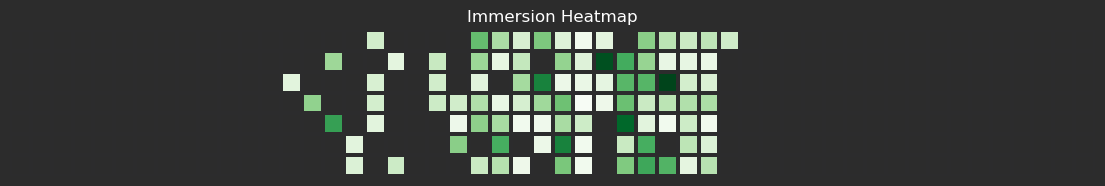

In [27]:
# Plotting the heatmap
plt.figure(figsize=(14, 4))
# Create a subplot to set the face color
ax = sns.heatmap(
    heatmap,
    cmap='Greens',
    linewidths=1.5,
    linecolor='#2c2c2d',
    cbar=False,
    square=True
)

# Set the background color
plt.gcf().set_facecolor('#2c2c2c')
ax.set_facecolor('#2c2c2c')

# Set text color to white
plt.title('Immersion Heatmap', color='white')
plt.xlabel('Week Number', color='white')
plt.ylabel('Day of the Week', color='white')
plt.axis('off')

plt.show()


In [28]:
daily_points.name = 'points'
daily_points.index.name = 'date'

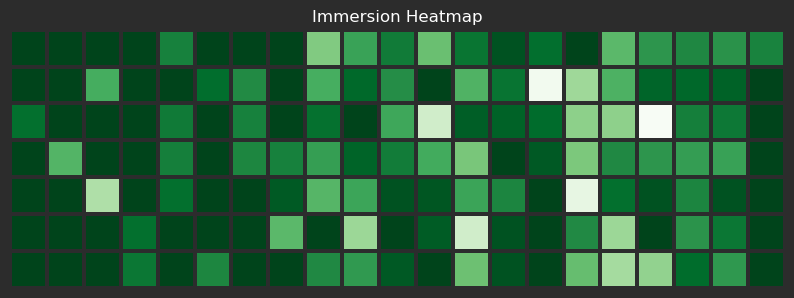

In [29]:
# Convert the series to a DataFrame and reset index to get the 'date' column
df = daily_points.reset_index()
df.columns = ['date', 'points']

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new DataFrame indexed by weeks and days
df['week'] = df['date'].dt.isocalendar().week
df['day'] = df['date'].dt.weekday
heatmap_data = df.pivot(index='day', columns='week', values='points')
# normalize the data between 0 and 255
heatmap_data = heatmap_data.fillna(0)
heatmap_data = (heatmap_data - heatmap_data.min().min()) / (heatmap_data.max().max() - heatmap_data.min().min()) * 255
# Plotting the heatmap
plt.figure(figsize=(10, 4))

# Create a subplot to set the face color
ax = sns.heatmap(
    heatmap_data,
    cmap='Greens_r',
    linewidths=1.5,
    linecolor='#2c2c2d',
    cbar=False,
    square=True,
)

# Set the background color
plt.gcf().set_facecolor('#2c2c2c')
ax.set_facecolor('#2c2c2c')

# Set text color to white
plt.title('Immersion Heatmap', color='white')
plt.xlabel('Week Number', color='white')
plt.ylabel('Day of the Week', color='white')
plt.axis('off')

plt.show()


In [30]:
df['points'].min()

0.0

In [51]:
from typing import Union, List, Literal

def check_media_type(media_type: Union[Literal["all"], List[str]]) -> None:
    """
    Check if the media_type is valid
    """
    if media_type == "all":
        return
    for media in media_type:
        if media not in points.keys():
            raise ValueError(f"Invalid media type: {media}")
check_media_type('test')

ValueError: Invalid media type: t

In [44]:
check_media_type(['ANIME'])

In [49]:
media_type = ['anime', 'manga', 'reading', 'vn', 'readtime', 'page']
media_type = ["all"] if media_type == "all" else [string.upper() for string in media_type]

In [50]:
media_type

['ANIME', 'MANGA', 'READING', 'VN', 'READTIME', 'PAGE']

In [64]:
class HeatmapGenerator:
    def __init__(self, media_type: Union[str, List[str]] = "all") -> None:
        self.points = {
            "LISTENING": 0.67,
            "READING": 1 / 350,
            "ANIME": 13,
            "READTIME": 0.67,
            "VN": 1 / 350,
            "MANGA": 0.25,
            "PAGE": 1,
        }
        self.media_type = list(set(media_type)) if isinstance(media_type, list) else [media_type]
        self.media_type = [s.upper() for s in self.media_type]
        self.check_media_type()

    def check_media_type(self) -> None:
        """
        Check if the media_type is valid
        """
        valid_media_types = list(self.points.keys())
        if self.media_type[0] != "ALL":
            for media in self.media_type:
                if media not in valid_media_types:
                    raise ValueError(
                        f"Invalid media type: {media}. Valid media types are {valid_media_types}"
                    )

In [65]:
a = HeatmapGenerator(['vn', 'ANIME'])
a.media_type

['ANIME', 'VN']